## 1- Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2- Read Dataset

In [2]:
df = pd.read_csv("spam_text_message_data.csv")
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


## 3- Gain Insights from Data

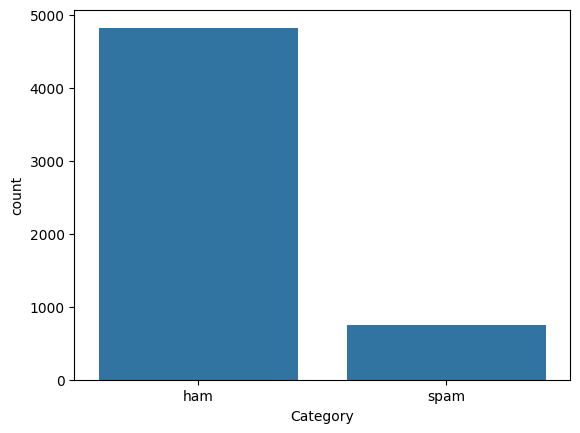

In [3]:
sns.countplot(x=df["Category"])
plt.show()

In [4]:
X = df["Message"]
Y = df["Category"]

print(Y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object


## 4- Encodeing

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(Y)

print(Y)
print(Y.shape)

[0 0 1 ... 0 0 0]
(5572,)


## 5- Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## 6- Tokenization

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 500
tkn = Tokenizer(num_words=max_words)
tkn.fit_on_texts(X_train)
seq = tkn.texts_to_sequences(X_train)

print(seq)

[[285, 262, 426, 46, 2, 403, 9, 81, 71, 7, 35, 252], [162, 117, 32, 5, 316], [1, 290, 82, 46, 81, 71, 174, 77, 181, 70, 50, 427, 43, 11], [47, 465, 98, 175, 58], [6, 17, 4, 126, 9, 383, 19, 139, 184, 35, 6, 172, 50, 126, 106, 85, 126, 36, 24, 236, 16, 18], [237, 114], [1, 61, 18, 5, 140, 2], [199, 360, 361, 8, 224, 374], [6, 83, 70, 2, 5], [20], [123, 4, 242, 26, 35, 466, 8, 2, 33, 44, 39, 86, 22, 49, 19, 428, 72, 80], [12, 5, 9, 14, 20, 64, 15, 243, 163], [29, 3, 95, 13, 156, 31, 46, 2, 296, 244, 176, 138, 28, 142, 176, 138, 270, 188, 189, 104, 16, 88, 29], [106, 85, 4, 297, 2], [118, 107, 243], [51, 117, 12, 124], [35, 3, 17, 3, 4, 298, 7, 17, 3, 12], [33, 317, 2, 7], [1, 177, 109], [3, 17, 114, 107, 104, 16], [3, 54, 10, 24, 113], [127, 53, 21, 3], [107, 48, 446, 46, 72, 178, 2, 38, 467, 94, 48, 65, 337, 142, 43], [252, 2], [8, 84, 318], [178, 221, 2, 221, 2, 142, 230, 194, 188], [1, 112, 245, 12, 5, 271, 384, 10, 45, 3, 33, 66, 29, 3, 375, 33, 66], [286, 429, 45], [45, 143, 1, 59, 

## 7- Padding

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 100
padded_docs = pad_sequences(seq, padding = 'pre', maxlen= max_len)

print(padded_docs)

[[  0   0   0 ...   7  35 252]
 [  0   0   0 ...  32   5 316]
 [  0   0   0 ... 427  43  11]
 ...
 [  0   0   0 ...  12  13  86]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...  84   3  30]]


## 8- Train Model

In [9]:
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding

embedding_vector_features = 30

model = Sequential()
model.add(Embedding(max_words, embedding_vector_features, input_length=max_len))
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print(model.summary())

c:\Users\Asus\NLP-sandbox\mynlpvenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## 9- Fit The Model

In [10]:
model.fit(padded_docs, Y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 415ms/step - accuracy: 0.8181 - loss: 0.4903 - val_accuracy: 0.8711 - val_loss: 0.2775
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 374ms/step - accuracy: 0.9242 - loss: 0.2308 - val_accuracy: 0.9675 - val_loss: 0.1171
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 373ms/step - accuracy: 0.9670 - loss: 0.1072 - val_accuracy: 0.9765 - val_loss: 0.1000
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 357ms/step - accuracy: 0.9795 - loss: 0.0753 - val_accuracy: 0.9776 - val_loss: 0.0819
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 367ms/step - accuracy: 0.9844 - loss: 0.0587 - val_accuracy: 0.9843 - val_loss: 0.0699
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 368ms/step - accuracy: 0.9874 - loss: 0.0457 - val_accuracy: 0.9787 - val_loss: 0.0752
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 379ms/step - accuracy: 0.9882 - loss: 0.0464 - val_accuracy: 0.9843 - val_loss: 0.0682
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 386ms/step - accuracy: 0.9900 - loss: 0.0336 - val_accu

## 10- Model Evaluation

In [11]:
text_seq = tkn.texts_to_sequences(X_test)
test_padded = pad_sequences(text_seq, maxlen = max_len)

In [12]:
accr = model.evaluate(test_padded, Y_test)
print(accr)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9853 - loss: 0.0510
[0.054151274263858795, 0.9874439239501953]


## 11- Visualization

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


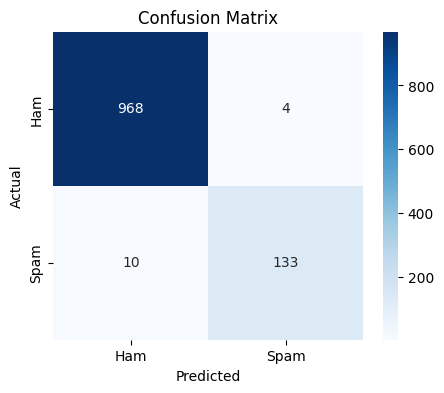

Accuracy: 0.9874439461883409
Precision: 0.9708029197080292
Recall: 0.9300699300699301


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


y_pred = (model.predict(test_padded) > 0.5).astype("int32")

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


acc = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
rec = recall_score(Y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)